In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic fraud detection data
X, y = make_classification(n_samples=5000,n_informative=2, n_redundant=0, n_repeated=0,  n_features=20, random_state=42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)


In [16]:
class FraudDetectionANN(nn.Module):
    def __init__(self):
        super(FraudDetectionANN, self).__init__()
        self.fc1 = nn.Linear(20, 64)  # Input Layer (20 features) → Hidden Layer (64 neurons)
        self.relu = nn.ReLU()  # Activation Function
        self.fc2 = nn.Linear(64, 32)  # Hidden Layer (64 neurons) → Hidden Layer (32 neurons)
        self.fc3 = nn.Linear(32, 1)  # Output Layer (Binary Classification)
        self.sigmoid = nn.Sigmoid()  # Sigmoid Activation for Binary Output

    def forward(self, x):
        print(f"Input Shape: {x.shape}")  # Debugging line
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [17]:
print(f"X_train shape before training: {X_train.shape}")  # Should be (4000, 20)

# Initialize Model
model = FraudDetectionANN()

# Define Loss Function & Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy for Classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 20
batch_size = 32
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train).squeeze()
    
    # Compute loss
    loss = criterion(outputs, y_train)
    loss.backward()  # Backpropagation
    optimizer.step()  # Update Weights
    
    losses.append(loss.item())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


X_train shape before training: torch.Size([4000, 20])
Input Shape: torch.Size([4000, 20])
Epoch 1/20, Loss: 0.7023
Input Shape: torch.Size([4000, 20])
Epoch 2/20, Loss: 0.6998
Input Shape: torch.Size([4000, 20])
Epoch 3/20, Loss: 0.6975
Input Shape: torch.Size([4000, 20])
Epoch 4/20, Loss: 0.6952
Input Shape: torch.Size([4000, 20])
Epoch 5/20, Loss: 0.6929
Input Shape: torch.Size([4000, 20])
Epoch 6/20, Loss: 0.6907
Input Shape: torch.Size([4000, 20])
Epoch 7/20, Loss: 0.6885
Input Shape: torch.Size([4000, 20])
Epoch 8/20, Loss: 0.6862
Input Shape: torch.Size([4000, 20])
Epoch 9/20, Loss: 0.6840
Input Shape: torch.Size([4000, 20])
Epoch 10/20, Loss: 0.6818
Input Shape: torch.Size([4000, 20])
Epoch 11/20, Loss: 0.6795
Input Shape: torch.Size([4000, 20])
Epoch 12/20, Loss: 0.6771
Input Shape: torch.Size([4000, 20])
Epoch 13/20, Loss: 0.6747
Input Shape: torch.Size([4000, 20])
Epoch 14/20, Loss: 0.6722
Input Shape: torch.Size([4000, 20])
Epoch 15/20, Loss: 0.6697
Input Shape: torch.Size([

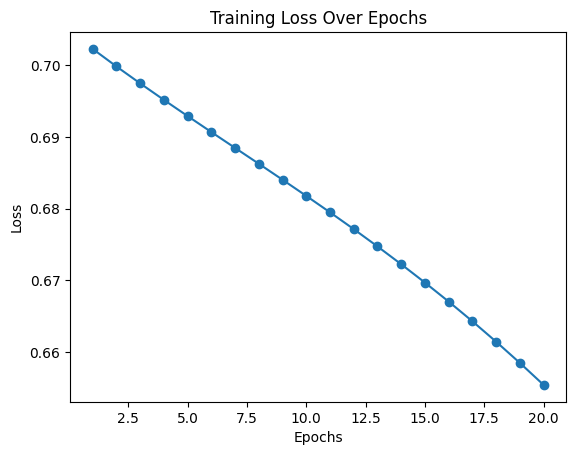

In [18]:
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()


In [20]:
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Select only the first two features
    X_plot = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Fix input shape by adding dummy features
    X_fixed = torch.zeros((X_plot.shape[0], 20))  # Create a (10000, 20) tensor
    X_fixed[:, :2] = X_plot  # Fill only the first two features

    with torch.no_grad():
        Z = model(X_fixed)  # Now it has the correct shape (10000, 20)
        Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')



def update(epoch):
    ax.clear()
    plot_decision_boundary(X_train.numpy(), y_train.numpy(), model, ax)
    ax.set_title(f"Epoch {epoch}")

ani = animation.FuncAnimation(fig, update, frames=20, repeat=False)
ani.save("ann-model.gif", writer='pillow', fps = 10)
plt.show()


Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])
Input Shape: torch.Size([10000, 20])


In [ ]:
print(X_train.shape)